In [12]:
# Import relevant packages 

import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import geopandas as gpd

In [76]:
# Call worldmap from geopandas. 
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# read text data files for lithology information for the world, as nparray. 
# data = pd.read_csv("Classnames.txt") # holds class specifications for lithologies. 
df1 = np.loadtxt('lithology_thermal_cond.txt')
print(df1)
# Replace all negative values from nparray with 0. 
df = np.where(df1<0, 0, df1)

#  Build a grid for the latitudes/longitudes of the earth. 
from shapely.geometry import Polygon 
from itertools import product

x_vals = list(np.linspace(-180, 180, 721))
y_vals = list(np.linspace(-90, 90, 361))

geoms = [
    Polygon([[lower_x, lower_y],
             [lower_x, upper_y],
             [upper_x, upper_y],
             [upper_x, lower_y],
             ]) 
    for (lower_x, upper_x), (lower_y, upper_y) in 
    product(
        zip(x_vals[:-1], x_vals[1:]),
        zip(y_vals[:-1], y_vals[1:]))]

gdf = gpd.GeoDataFrame({'geometry': geoms})
gdf.shape

[[-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 ...
 [   16.    16.    16. ...    16.    16.    16.]
 [   16.    16.    16. ...    16.    16.    16.]
 [   16.    16.    16. ...    16.    16.    16.]]


(259200, 1)

In [65]:
# Checking GeoDataFrame. 
gdf.head()
print(gdf)

                                                 geometry  rock  lithology
0       POLYGON ((-180.00000 -90.00000, -180.00000 -89...  16.0       16.0
1       POLYGON ((-180.00000 -89.50000, -180.00000 -89...  16.0       16.0
2       POLYGON ((-180.00000 -89.00000, -180.00000 -88...  16.0       16.0
3       POLYGON ((-180.00000 -88.50000, -180.00000 -88...  16.0       16.0
4       POLYGON ((-180.00000 -88.00000, -180.00000 -87...  16.0       16.0
...                                                   ...   ...        ...
259195  POLYGON ((179.50000 87.50000, 179.50000 88.000...   0.0        0.0
259196  POLYGON ((179.50000 88.00000, 179.50000 88.500...   0.0        0.0
259197  POLYGON ((179.50000 88.50000, 179.50000 89.000...   0.0        0.0
259198  POLYGON ((179.50000 89.00000, 179.50000 89.500...   0.0        0.0
259199  POLYGON ((179.50000 89.50000, 179.50000 90.000...   0.0        0.0

[259200 rows x 3 columns]


                  geometry  index_right  lith
0  POINT (2.00000 5.00000)            1     2
Basic volcanic rocks


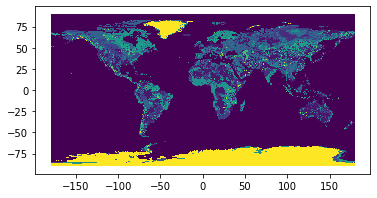

In [101]:
# Adding new column to GeoDataframe for all the different values of the nparray
gdf['lithology'] = df[::-1].T.flatten()
# The matching lithologies to the values stated in the array
lith = ["Unconsolidated sediments","Basic volcanic rocks","Siliciclastic Sedimentary rocks","Basic Plutonic rocks","Mixed Sedimentary rocks","Carbonate sedimentary rocks","Acid volcanic rocks","Metamorphic rocks","Acid Plutonic rocks","Intermediate Volcanic R.","Water bodies","Pyroclastics","Intermediate Plutonic R.","Evaporites","No-data","ice and glaciers"]
# rock_type = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16][::-1]
# Plotting the GeoDataframe lithology column showing the varying lithologies of the earth. 
gdf.plot(column='lithology')

# Joining all data together to make callable. 
from shapely.geometry import Point

coords = [2,5]

lookup = gpd.GeoDataFrame({'geometry':[Point(coords)]})
data = gpd.GeoDataFrame({'geometry':[
     Polygon([[0,0],[0,3],[3,3],[3,0]]),
     Polygon([[0,3],[0,6],[3,6],[3,3]])
],'lith':[1,2]})

looked_up = lookup.sjoin(data,how='inner')
looked_up.head()
print(looked_up)
print(lith[looked_up.at[0, 'lith']-1]) # Stating the lithology type 